# Introduction

This project uses a [dataset](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) which describes Euro daily exchange rates between 1999 and 2021. We will eventually aim to show how the Euro-USD exchange rate was affected during the 2007-2008 financial crisis after learning about rolling means.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

In [3]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[["Time","US_dollar"]].copy()
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.3062     1
1.3469     1
0.9470     1
1.4370     1
1.4275     1
Name: US_dollar, Length: 3528, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]
euro_to_dollar["US_dollar"]=euro_to_dollar["US_dollar"].astype("float")
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

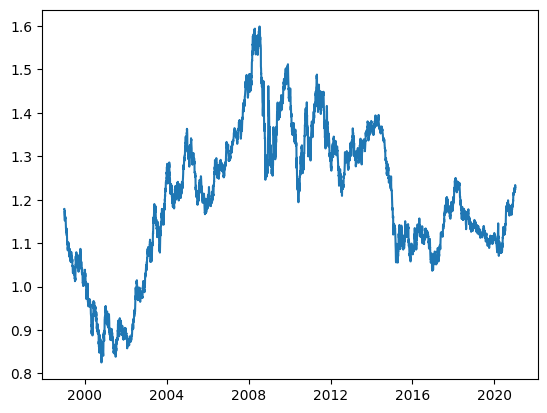

In [13]:
plt.style.use("default")
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

We see so many jagged lines because our time difference is daily. The smoother we want the graph to look, the more we need to increase the rolling window. This can be shown below:

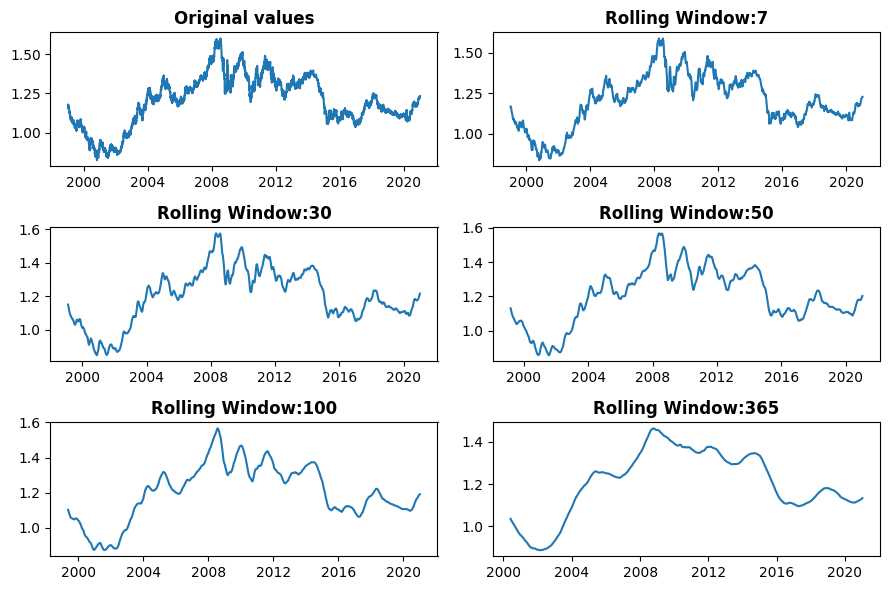

In [14]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout()
plt.show()

In [15]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


### How did the exchange rates look during the 2007-2008 Financial Crisis?

The 2007-2008 Financial Crisis was a severe worldwide economic crisis that occurred in the early 21st century. It was the most serious financial crisis since the Great Depression.

* The mortgage crisis started in 2007 when the housing industry’s bubble burst

* With the previous years’ increasing home values and low mortgage rates, houses were thought of more as investments rather than places to live in

* Since the financial industry heavily invested in mortgage-backed derivatives, the housing industry’s decline became a disaster for the financial industry

* The 2007 financial crisis ushered in the 2008 Great Recession

We will see if the exchange rate was affected or was any kind of indication of this crisis.

In [16]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

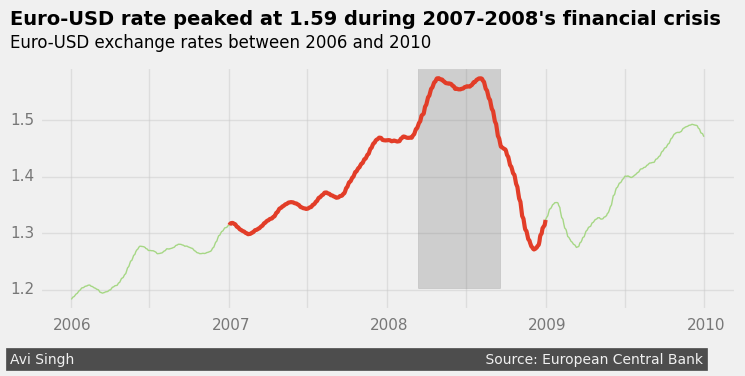

In [18]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

# Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

# Highlighting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
    
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

ax.text(732172.0, 1.07, 'Avi Singh' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

ax.grid(alpha=0.5)

plt.show()

## Conclusion

In the 2007-2008 period, we can see that the Euro being higher than the USD means that the USD was valued lower relative to the Euro. The USD value was lower than ever before seen in that period as well as immediately following. This would correspond accurately with the financial crisis.